In [1]:
#import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import imread, imshow, subplots, show

#rom sklearn.metrics import RocCurveDisplay

In [2]:
# Load the subset from the file
data = np.load('Tomato_balanced.npz')
X_train_balanced = data['X_train_balanced']
y_train_balanced = data['y_train_balanced']

In [3]:
# Load the subset from the file
data = np.load('Tomato_test.npz')
X_test = data['X_test']
y_test = data['y_test']

In [4]:
# Print the shape of the features to check
print(f"X_train_balanced shape: {X_train_balanced.shape}")
print(f"y_train_balanced shape: {y_train_balanced.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_balanced shape: (4252, 224, 224, 3)
y_train_balanced shape: (4252,)
X_test shape: (461, 224, 224, 3)
y_test shape: (461,)


In [5]:
X_test.shape

(461, 224, 224, 3)

In [6]:
img_shape = X_train_balanced.shape[1:]
img_shape

(224, 224, 3)

In [7]:
#Identify class distribution
unique_classes, class_counts = np.unique(y_train_balanced, return_counts=True)

dict(zip(unique_classes, class_counts))

{0: 450, 1: 450, 2: 632, 3: 716, 4: 654, 5: 450, 6: 450, 7: 450}

In [8]:
from tensorflow.keras.applications import InceptionV3
import tensorflow as tf

base_model = tf.keras.applications.InceptionV3(input_shape=img_shape,
                                             include_top=False,
                                             weights='imagenet')

In [9]:
import tensorflow as tf
import numpy as np

# Freeze the base model to avoid updating its weights
base_model.trainable = False

# Build the feature extraction model
feature_extractor = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D()  # Pool the features to a vector
])


In [10]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [12]:
from sklearn.svm import SVC
#from sklearn.utils.class_weight import compute_class_weight

#class_weights = compute_class_weight('balanced', classes=np.unique(y_train_balanced), y=y_train_balanced)
#class_weight_dict = dict(zip(np.unique(y_train_balanced), class_weights))

svm_incV3 = SVC(kernel='poly', probability=True, random_state=42) # class_weight=class_weight_dict

In [13]:
import time
start = time.time()

print("Extracting features from training data...")
X_train_features = feature_extractor.predict(X_train_balanced)
print("Fitting SVM...")
svm_incV3.fit(X_train_features, y_train_balanced)

end = time.time()
total_time = end - start

Extracting features from training data...
Fitting SVM...


In [14]:
print(f"Total time taken for fitting: {total_time:.2f} sec")

Total time taken for fitting: 57.65 sec


In [15]:
X_train_features

array([[0.14290845, 0.13816048, 0.3879057 , ..., 0.        , 0.6292361 ,
        0.35352436],
       [0.33381003, 0.11375675, 0.647204  , ..., 0.15234749, 0.43755665,
        0.2578469 ],
       [0.04905466, 0.08958483, 0.40463164, ..., 0.05684093, 0.63741106,
        0.28969952],
       ...,
       [0.00607819, 0.13457385, 1.3784387 , ..., 0.32008293, 0.49639893,
        0.0884432 ],
       [0.10968927, 0.20790035, 1.956605  , ..., 0.7440813 , 0.23529482,
        0.52088934],
       [0.01301616, 0.14339724, 1.6010987 , ..., 0.9761081 , 0.31199828,
        0.16712388]], dtype=float32)

In [16]:
# Extract features for the test data
print("Extracting features from test data...")
X_test_features = feature_extractor.predict(X_test)

Extracting features from test data...


In [17]:
# Print the shape of the features to check
print(f"X_train_features shape: {X_train_features.shape}")
print(f"X_test_features shape: {X_test_features.shape}")

X_train_features shape: (4252, 2048)
X_test_features shape: (461, 2048)


In [18]:
# Predict on the test set
y_pred = svm_incV3.predict(X_test_features)
y_pred

array([2, 0, 0, 0, 0, 0, 0, 0, 3, 7, 0, 0, 1, 7, 0, 0, 3, 0, 0, 3, 3, 0,
       4, 3, 0, 0, 0, 7, 0, 0, 0, 1, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       3, 3, 7, 7, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 0,
       3, 3, 1, 3, 1, 3, 3, 2, 2, 2, 2, 7, 7, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 3, 4, 3, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 4, 3, 3, 2, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [19]:
#import numpy as np
print(np.bincount(y_test))

[ 50  22  92 104  95  37   8  53]


In [20]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [21]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report, RocCurveDisplay, recall_score, f1_score
from sklearn.metrics import precision_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
precision_per_class = precision_score(y_test, y_pred, average=None)
f1_per_class = f1_score(y_test, y_pred, average=None)

# Print metrics as percentages rounded to 2 decimal places
print(f"SVM Test Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

# Print precision and F1 score per class, rounded to 2 decimal places as percentages
print(f"Precision per Class: {[round(p * 100, 2) for p in precision_per_class]}%")
print(f"F1 Score per Class: {[round(f * 100, 2) for f in f1_per_class]}%")

SVM Test Accuracy: 78.31%
Precision: 78.00%
Recall: 78.31%
F1 Score: 77.23%
Precision per Class: [82.86, 45.45, 79.41, 72.44, 84.76, 90.62, 100.0, 71.11]%
F1 Score per Class: [68.24, 30.3, 83.51, 79.65, 89.0, 84.06, 66.67, 65.31]%


In [22]:
report = classification_report(y_test, y_pred)
    
print(report)

              precision    recall  f1-score   support

           0       0.83      0.58      0.68        50
           1       0.45      0.23      0.30        22
           2       0.79      0.88      0.84        92
           3       0.72      0.88      0.80       104
           4       0.85      0.94      0.89        95
           5       0.91      0.78      0.84        37
           6       1.00      0.50      0.67         8
           7       0.71      0.60      0.65        53

    accuracy                           0.78       461
   macro avg       0.78      0.67      0.71       461
weighted avg       0.78      0.78      0.77       461



In [23]:
class_labels = ['Early_blight','Healthy','Late_blight','Leaf_Miner',
                 'Magnesium_Deficiency','Nitrogen_Deficiency','Pottassium_Deficiency','Spotted_Wilt_Virus']
len(class_labels)

8

[[29  2  3  8  1  0  0  7]
 [ 1  5  0 16  0  0  0  0]
 [ 1  0 81  6  1  0  0  3]
 [ 2  2  1 92  6  0  0  1]
 [ 0  0  1  2 89  1  0  2]
 [ 0  1  4  0  3 29  0  0]
 [ 0  0  0  0  3  1  4  0]
 [ 2  1 12  3  2  1  0 32]]


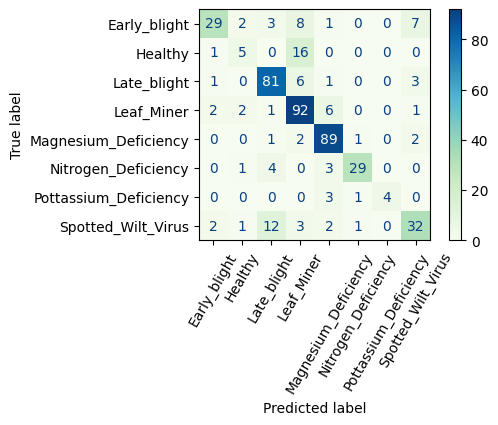

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print(cm)


display_cm = ConfusionMatrixDisplay(cm, display_labels=class_labels)
fig,ax = plt.subplots(figsize=(5,3))
display_cm.plot(cmap='GnBu', ax=ax, xticks_rotation=60)

In [25]:
import sklearn

y_pred_proba = svm_incV3.predict_proba(X_test_features)
sklearn.metrics.roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

0.966704914157355

In [26]:
from tensorflow.keras.utils import to_categorical
y_test_cat = tf.keras.utils.to_categorical(y_test)
y_test_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

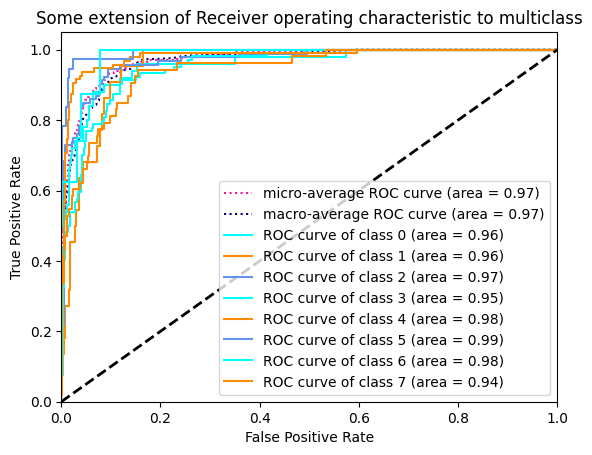

In [27]:
n_classes=8
 
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_cat.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw=2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
from itertools import cycle
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])



##### Plot all ROC curves ######


plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle="dotted",
    linewidth=1.5,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="dotted",
    linewidth=1.5,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1.5,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [28]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.7356060128124982

In [29]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred_proba)

0.6257786307713772

In [30]:
import pickle

with open('svm_incV3.pkl', 'wb') as model_file:
    pickle.dump(svm_incV3, model_file)

In [31]:
# Load the model from the file
with open('svm_incV3.pkl', 'rb') as model_file:
    svm_incV3 = pickle.load(model_file)

In [32]:
# Save the subset to a file (you can use npz format or CSV for simplicity)
np.savez('Incep_SVM_test_Feature.npz', X_test_features=X_test_features, y_test=y_test)

In [33]:
# Load the subset from the file
data = np.load('Incep_SVM_test_Feature.npz')
X_test_features = data['X_test_features']
y_test = data['y_test']

In [34]:
# Predict on the test set
y_pred = svm_incV3.predict(X_test_features)
y_pred

array([2, 0, 0, 0, 0, 0, 0, 0, 3, 7, 0, 0, 1, 7, 0, 0, 3, 0, 0, 3, 3, 0,
       4, 3, 0, 0, 0, 7, 0, 0, 0, 1, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       3, 3, 7, 7, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 0,
       3, 3, 1, 3, 1, 3, 3, 2, 2, 2, 2, 7, 7, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 3, 4, 3, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 4, 3, 3, 2, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

Extracting features from test data...


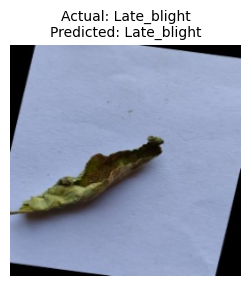

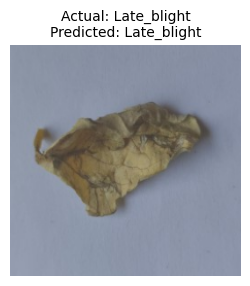

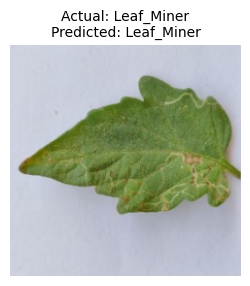

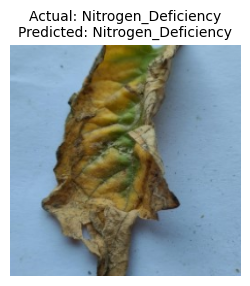

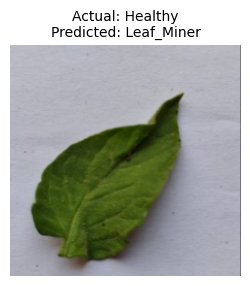

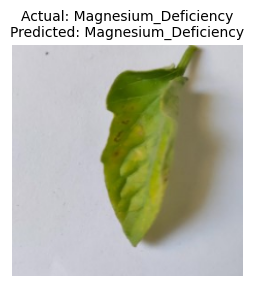

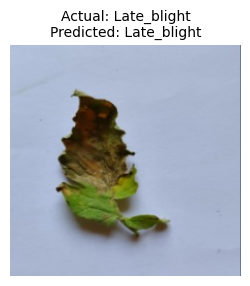

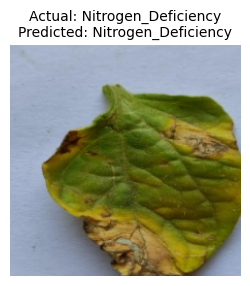

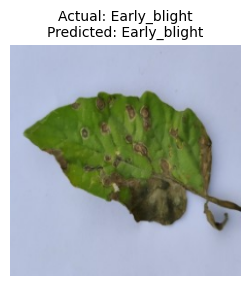

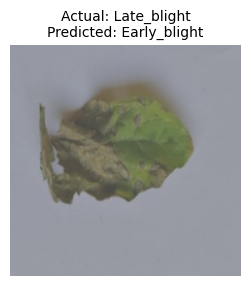

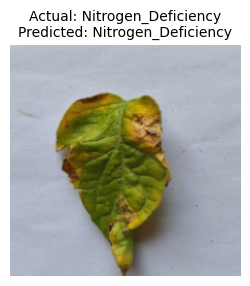

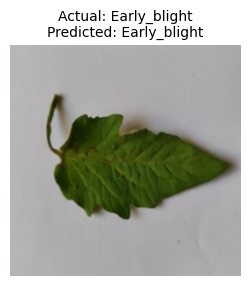

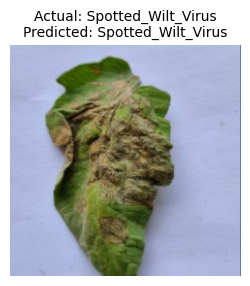

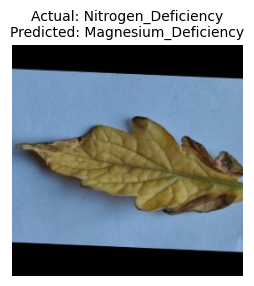

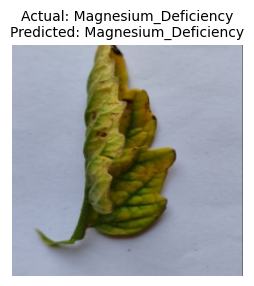

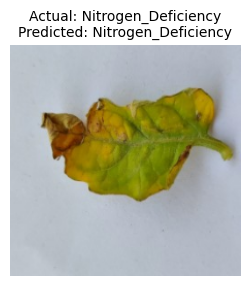

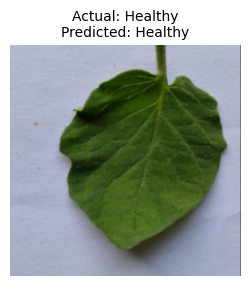

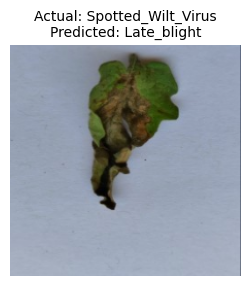

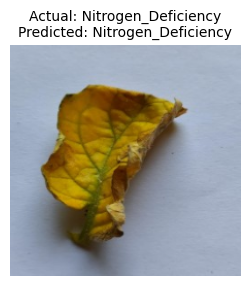

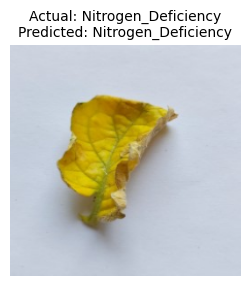

In [35]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Extract features for the test set using MobileNet feature extractor
print("Extracting features from test data...")
X_test_features = feature_extractor.predict(X_test)

# Predict the class labels for the test set using the trained SVM model
y_pred = svm_incV3.predict(X_test_features)

class_labels = ['Early_blight','Healthy','Late_blight','Leaf_Miner',
                 'Magnesium_Deficiency','Nitrogen_Deficiency','Pottassium_Deficiency','Spotted_Wilt_Virus']

# Select 20 random indices from the test set
random_indices = random.sample(range(len(X_test)), 20)

# Loop through the randomly selected indices
for index in random_indices:
    # Select the test image and its corresponding actual label
    test_image = X_test[index]
    actual_label_index = y_test[index]  # Assuming y_test contains the actual labels as indices

    # Get the predicted class label from the SVM prediction
    predicted_class_index = y_pred[index]

    # Get the actual and predicted class labels
    actual_label = class_labels[actual_label_index]
    predicted_label = class_labels[predicted_class_index]

    # Display the image with Matplotlib
    plt.figure(figsize=(3, 3))  # Set figure size

    # If the image is normalized, scale it back to the range [0, 255] for display
    if test_image.max() <= 1.0:
        display_image = test_image * 255  # Rescale to [0, 255]
    else:
        display_image = test_image  # If already in [0, 255], keep it as is

    # Display the image
    plt.imshow(display_image.astype('uint8'))  # Convert to uint8 for correct display
    plt.axis('off')  # Turn off axis
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}", fontsize=10)  # Add title
    plt.show()


In [36]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report, RocCurveDisplay, recall_score, f1_score
from sklearn.metrics import precision_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
precision_per_class = precision_score(y_test, y_pred, average=None)
f1_per_class = f1_score(y_test, y_pred, average=None)

# Print metrics as percentages rounded to 2 decimal places
print(f"SVM Test Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

# Print precision and F1 score per class, rounded to 2 decimal places as percentages
print(f"Precision per Class: {[round(p * 100, 2) for p in precision_per_class]}%")
print(f"F1 Score per Class: {[round(f * 100, 2) for f in f1_per_class]}%")

SVM Test Accuracy: 78.31%
Precision: 78.00%
Recall: 78.31%
F1 Score: 77.23%
Precision per Class: [82.86, 45.45, 79.41, 72.44, 84.76, 90.62, 100.0, 71.11]%
F1 Score per Class: [68.24, 30.3, 83.51, 79.65, 89.0, 84.06, 66.67, 65.31]%
